In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from config import api_key_weather
from citipy import citipy
from pprint import pprint

output_data_file = "cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

In [3]:
api_key = api_key_weather
url = "http://api.openweathermap.org/data/2.5/weather?"
results = []
#r = 0

for x in range (len(cities)):
    #cuenta = r + 1
    city = cities[x]
    query_url = url + "appid=" + api_key + "&q=" + city
    responses = requests.get(query_url).json()
    if  responses not in results:
        results.append(responses)

In [17]:
City = []
Cloudiness =[]
Country = [] 
Date = []     
Humidity = [] 
Lat = []      
Lng = []      
Max_Temp =[]  
Wind_Speed = []

for y in range (len(responses)):
    City.append(results[y]["name"])
    Cloudiness.append(results[y]["clouds"]["all"])
    Country.append(results[y]["sys"]["country"]) 
    Date.append(results[y]["dt"]) 
    Humidity.append(results[y]["main"]["humidity"])
    Lat.append(results[y]["coord"]["lat"])
    Lng.append(results[y]["coord"]["lon"])
    Max_Temp.append(results[y]["main"]["temp_max"])
    Wind_Speed.append(results[y]["wind"]["speed"])
    
    try: 
        City.append(results[y]["name"])
        Cloudiness.append(results[y]["clouds"]["all"])
        Country.append(results[y]["sys"]["country"]) 
        Date.append(results[y]["dt"]) 
        Humidity.append(results[y]["main"]["humidity"])
        Lat.append(results[y]["coord"]["lat"])
        Lng.append(results[y]["coord"]["lon"])
        Max_Temp.append(results[y]["main"]["temp_max"])
        Wind_Speed.append(results[y]["wind"]["speed"])
    except KeyError:




SyntaxError: unexpected EOF while parsing (<ipython-input-17-e46fbf2cbc79>, line 34)

In [61]:
CityT = pd.DataFrame(columns=[City, Country, Cloudiness, Date, Humidity, Lat, Lng, Max_Temp, Wind_Speed])
CloudT = pd.DataFrame(Cloudiness)
CountryT = pd.DataFrame(Country)
CityT.transpose()

,,,,,,,,
Sorland,NO,0,1563543719,77,67.67,12.69,295.150,5.10
Ternuvate,UA,0,1563543720,36,47.83,36.13,299.150,5.00
Tasiilaq,GL,40,1563543720,87,65.61,-37.64,279.150,1.00
Dunedin,NZ,100,1563543460,87,-45.87,170.50,282.590,5.81
Rikitea,PF,92,1563543721,63,-23.12,-134.97,292.148,6.96
Punta Arenas,CL,40,1563543721,74,-53.16,-70.91,276.150,9.30
Tuatapere,NZ,13,1563543721,97,-46.13,167.69,279.820,3.74
Saint-Philippe,CA,40,1563543441,83,45.36,-73.48,299.260,4.60
Pangnirtung,CA,90,1563543722,93,66.15,-65.72,285.150,1.50
Dikson,RU,24,1563543722,74,73.51,80.55,279.648,8.41


In [63]:
data = {"City":City,
    "Country": Country,
    "Cloudiness":Cloudiness,
    "Date": Date,
    "Humidity": Humidity,
    "Lat": Lat,
    "Lng": Lng,
    "Max_Temp": Max_Temp,
    "Wind_Speed": Wind_Speed}
df = pd.DataFrame(data)
df

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Sorland,NO,0,1563543719,77,67.67,12.69,295.150,5.10
1,Ternuvate,UA,0,1563543720,36,47.83,36.13,299.150,5.00
2,Tasiilaq,GL,40,1563543720,87,65.61,-37.64,279.150,1.00
3,Dunedin,NZ,100,1563543460,87,-45.87,170.50,282.590,5.81
4,Rikitea,PF,92,1563543721,63,-23.12,-134.97,292.148,6.96
5,Punta Arenas,CL,40,1563543721,74,-53.16,-70.91,276.150,9.30
6,Tuatapere,NZ,13,1563543721,97,-46.13,167.69,279.820,3.74
7,Saint-Philippe,CA,40,1563543441,83,45.36,-73.48,299.260,4.60
8,Pangnirtung,CA,90,1563543722,93,66.15,-65.72,285.150,1.50
9,Dikson,RU,24,1563543722,74,73.51,80.55,279.648,8.41


In [65]:
df.to_csv('cities.csv',index=False)

In [66]:
latVStemp = df[['Lat', 'Max_Temp']]
latVShum = df[['Lat', 'Humidity']]
latVSclo = df[['Lat', 'Cloudiness']]
latVSwin = df[['Lat', 'Wind_Speed']]

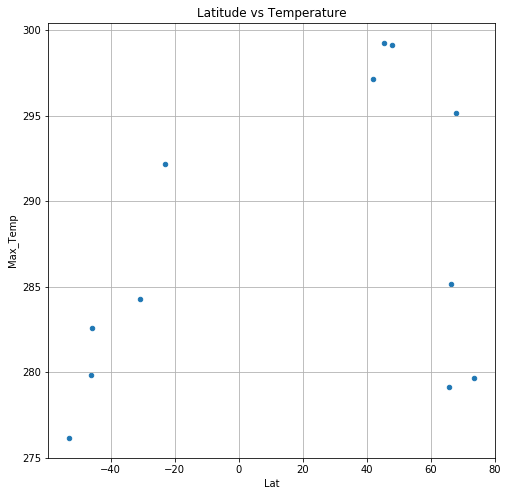

In [68]:
latVStemp.plot(kind="scatter", x="Lat", y="Max_Temp", grid=True, figsize=(8,8), title="Latitude vs Temperature")

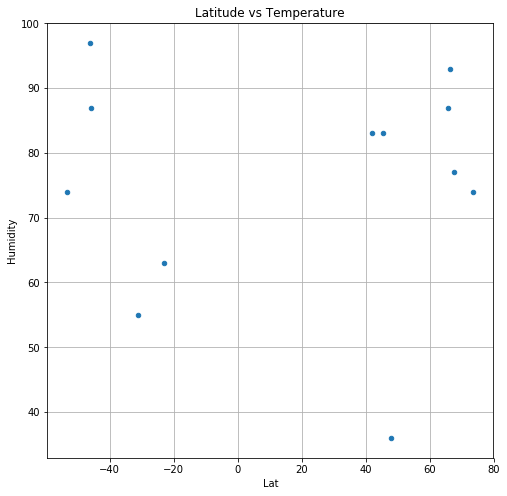

In [69]:
latVShum.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8), title="Latitude vs Humidity")

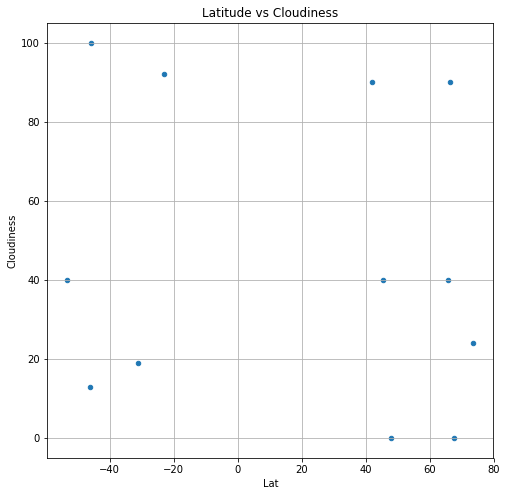

In [70]:
latVSclo.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8), title="Latitude vs Cloudiness")

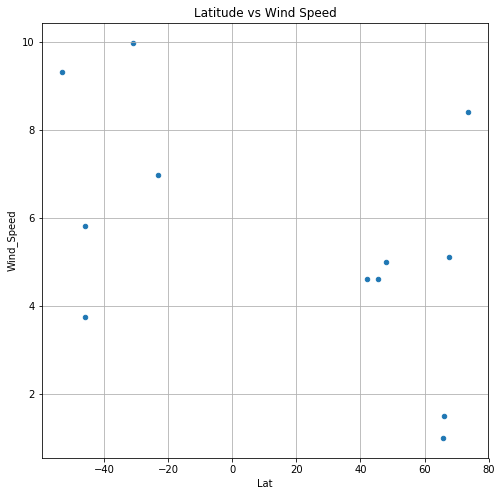

In [71]:
latVSwin.plot(kind="scatter", x="Lat", y="Wind_Speed", grid=True, figsize=(8,8), title="Latitude vs Wind Speed")